Please enter the data you'd like: AAPL
Please enter no. of years to simulate: 75
 Mu is:  -0.00121312001591
Sigma is:  0.00925301737572726
Start price is:  167.779999


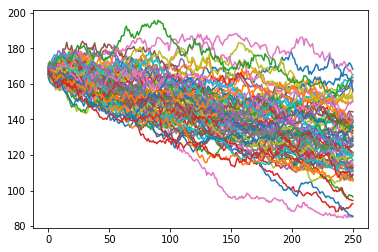

In [7]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt


# This function takes a ticker symbol and a Pandas data frame.
# It write a CSV file to the current directory. The file contains the data.
def write_data_to_file(ticker,df):
    df.to_csv("./" + ticker + ".csv")


#This function takes a ticker symbol and loads a data frame
#with the data stored in a CSV file in the current directory.
def get_data_from_file(ticker):
    f_name = ticker + ".csv"
    df = pd.read_csv(f_name, delimiter=",")
    return df

#This function computes the average value for a list of numbers.
def compute_average(num_list):

    count = len(num_list)
    total = 0

    for i in range (0, count):
        total = total + num_list[i]

    avg = total/count
    return avg

#Task 1
def compute_average_drift(num_list):
    no_of_entries = len(num_list)
    total = 0
    for i in range (0, no_of_entries-1):
        relative_change = (num_list[i+1] - num_list[i])/num_list[i]
        total = total + relative_change
    average_drift = total/(no_of_entries -1)
    return average_drift

def compute_std_deviation(num_list, mu):
    no_of_entries = len(num_list)
    total = 0
    for i in range (0, no_of_entries):
        total = total + (num_list[i]-mu)**2

    std_deviation = math.sqrt(total/ (no_of_entries -1))
    return std_deviation

#Task 2
def Calculate_Avg_close(num_list):
    for i in range (0, len(num_list)-1):
        total = total + num_list[i]
    s = total / (len(num_list)-1)
    return s

def random_daily_return(s, mu, sigma):
    R = np.random.normal(0,1)
    delta = (s * mu) + (s * sigma * R)
    return s + delta

def random_stock_year(s, p, r):
    element_list = []
    for i in range(0,251):
        s = random_daily_return(s, p, r)
        element_list.append(s)

    return element_list

def compute_relative_changes(data):
    result = []
    for i in range (1, len(data)):
        temp = (data[i]-data[i-1])/data[i-1]
        result.append(temp)
    return result

ticker = input("Please enter the data you'd like: ")
if not ticker in ['AAPL', 'GOOG', 'AMZN']:
    print ("Invalid ticker entered.")
    raise ValueError;

no_of_simulations = int(input ("Please enter no. of years to simulate: "))
if no_of_simulations <= 0:
    raise ValueError ("Incorrect value entered.")

df = get_data_from_file(ticker)
adj_closes = df['Adj Close']
relative_changes = compute_relative_changes(adj_closes)


mu = compute_average(relative_changes)
print(" Mu is: ", mu)
sigma = compute_std_deviation(relative_changes, mu)
print ("Sigma is: ", sigma)
start_p = float(adj_closes.tail(1))
print("Start price is: ", start_p)

for i in range(0, no_of_simulations):
    year = random_stock_year(start_p, mu, sigma)
    plt.plot(year)

plt.show()